In [4]:
import numpy as np

p=10
r=28
b=8/3
N = 6450
x = np.zeros(N)
y = np.zeros(N)
z = np.zeros(N)
x[0]=10
y[0]=1
z[0]=0
h=0.01
for i in range(N-1):
    K1=p*(y[i]-x[i])
    L1=r*x[i]-y[i]-x[i]*z[i]
    M1=-b*z[i]+x[i]*y[i]
    
    K2=p*((y[i]+h/2*L1)-(x[i]+h/2*K1))
    L2=r*(x[i]+h/2*K1)-(y[i]+h/2*L1)-(x[i]+h/2*K1)*(z[i]+h/2*M1)
    M2=-b*(z[i]+h/2*M1)+(x[i]+h/2*K1)*(y[i]+h/2*L1)
    
    K3=p*((y[i]+h/2*L2)-(x[i]+h/2*K1))
    L3=r*(x[i]+h/2*K1)-(y[i]+h/2*L2)-(x[i]+h/2*K1)*(z[i]+h/2*M2)
    M3=-b*(z[i]+h/2*M1)+(x[i]+h/2*K1)*(y[i]+h/2*L2)
    
    K4=p*((y[i]+h*L3)-(x[i]+h*K3))
    L4=r*(x[i]+h*K3)-(y[i]+h*L3)-(x[i]+h*K3)*(z[i]+h*M3)
    M4=-b*(z[i]+h*M3)+(x[i]+h*K3)*(y[i]+h*L3)
    
    x[i+1]=x[i]+h/6*(K1+2*K2+2*K3+K4)
    y[i+1]=y[i]+h/6*(L1+2*L2+2*L3+L4)
    z[i+1]=z[i]+h/6*(M1+2*M2+2*M3+M4)

In [5]:
x_ = x[3999:]
x_ = x_[list(range(0,x_.shape[0],2))]

y_ = y[3999:]
y_ = y_[list(range(0,y_.shape[0],2))]

z_ = z[3999:]
z_ = z_[list(range(0,z_.shape[0],2))]

Text(0.5, 1.0, 'Lorenz - z(t)')

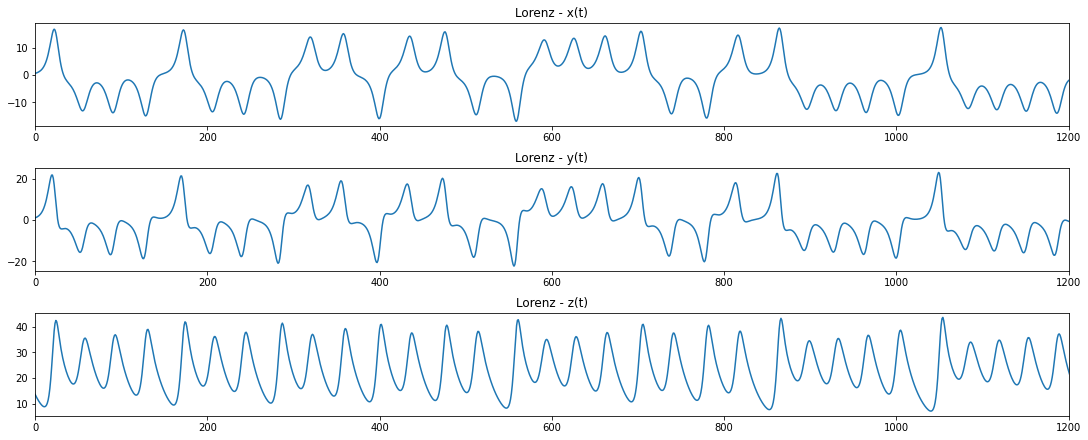

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, axes = plt.subplots(ncols=1, nrows=3, constrained_layout=True, figsize=(15, 6))
sns.lineplot(y=x_, x=np.arange(x_.shape[0]), ax=axes[0])
axes[0].set_xlim(0, 1200)
axes[0].set_title('Lorenz - x(t)')

sns.lineplot(y=y_, x=np.arange(y_.shape[0]), ax=axes[1])
axes[1].set_xlim(0, 1200)
axes[1].set_title('Lorenz - y(t)')

sns.lineplot(y=z_, x=np.arange(z_.shape[0]), ax=axes[2])
axes[2].set_xlim(0, 1200)
axes[2].set_title('Lorenz - z(t)')

In [11]:
def generate_bases(ts, folder):
    N = ts.shape[0]
    m = 6
    tau = 2
    P = 1200
    X = np.zeros((P, m))
    Y = np.zeros(P)

    for ii in range(m):
        for jj in range(P):
            X[jj, ii] = ts[jj + ii * tau]
            Y[jj] = ts[jj + ii * tau + 1]

    np.savetxt(folder + 'X_train.csv', X[:1000, :])
    np.savetxt(folder + 'X_test.csv', X[1000:, :])
    np.savetxt(folder + 'Y_train.csv', Y[:1000])
    np.savetxt(folder + 'Y_test.csv', Y[1000:])

In [12]:
generate_bases(x_, 'data/x/')
generate_bases(y_, 'data/y/')
generate_bases(z_, 'data/z/')